In [1]:
import sys
sys.path.append('../py/')
import numpy as np
import matplotlib.pyplot as plt
from coordpar.diversity_problem import DiversityProblem
import coordpar.exclusion as ex

In [2]:
precision = 1000
savefig = True
fig_directory = "../fig"

# Exclusion Zone Visualisation

In [3]:
# Setup problem
np.random.seed(4)
n = 50
p = 5
s = 2
dp = DiversityProblem.random(n,p,s)

In [4]:
# Choose a cut a plot
y1 = np.zeros(n)
y1[[4,17,27,35,39]] = 1

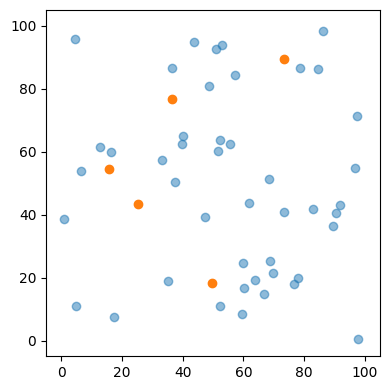

In [5]:
fig,axes = plt.subplots(1,figsize=(4,4))
axes.plot(dp.locations[y1==0,0],dp.locations[y1==0,1],ls="",marker="o",alpha=0.5)
axes.plot(dp.locations[y1==1,0],dp.locations[y1==1,1],ls="",marker="o")
axes.set_xlim(-5,105)
axes.set_ylim(-5,105)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_y1_sol.pdf")
plt.show()

In [6]:
# Let alpha=1, determine all 5 exclusion zones
X_1a, Y_1a, Z_1a = ex.get_exclusion_zones(dp,y1,space_increase=15)

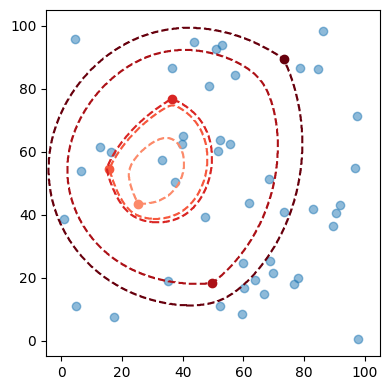

In [7]:
fig,axes = plt.subplots(1,figsize=(4,4))
ex.plot_zones_onto_axes(axes,y1,X_1a,Y_1a,Z_1a,dp)
axes.set_xlim(-5,105)
axes.set_ylim(-5,105)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_y1_zones.pdf")
plt.show()

In [8]:
print("Proportion of removed solutions:\t",ex.get_proportion_solutions_removed(dp,y1))

Proportion of removed solutions:	 0.0031121977005418265


Therefore, none of the points in $y_1$ can swap with 31, 22.

Let us take the 3 worst points and swap such that
 * 4 -> 40
 * 17 -> 9
 * 39 -> 0

In [9]:
y2 = np.zeros(n)
y2[[40,9,27,35,0]] = 1

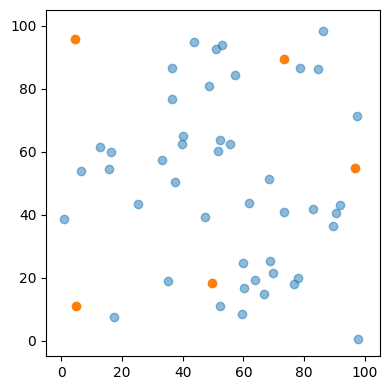

In [10]:
fig,axes = plt.subplots(1,figsize=(4,4))
axes.plot(dp.locations[y2==0,0],dp.locations[y2==0,1],ls="",marker="o",alpha=0.5)
axes.plot(dp.locations[y2==1,0],dp.locations[y2==1,1],ls="",marker="o")
axes.set_xlim(-5,105)
axes.set_ylim(-5,105)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_y2_sol.pdf")
plt.show()

What happens to the exclusion zones from y1?

In [11]:
X_1b, Y_1b, Z_1b = ex.get_exclusion_zones(dp,y1,dp.f(y2),space_increase=20)

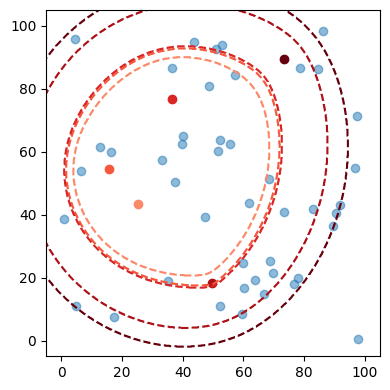

In [12]:
# Choose a cut a plot
fig,axes = plt.subplots(1,figsize=(4,4))
ex.plot_zones_onto_axes(axes,y1,X_1b,Y_1b,Z_1b,dp)
axes.set_xlim(-5,105)
axes.set_ylim(-5,105)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_y1_zones_expanded.pdf")
plt.show()

In [13]:
print("Proportion of removed solutions:\t",ex.get_proportion_solutions_removed(dp,y1,dp.f(y2)))

Proportion of removed solutions:	 0.24017302573203195


So now there are **no valid swaps for the solution $y_1$**.

What about the cut from $y_2$?

In [14]:
# Let alpha=1, determine all 5 exclusion zones
X_2a, Y_2a, Z_2a = ex.get_exclusion_zones(dp,y2,space_increase=10)

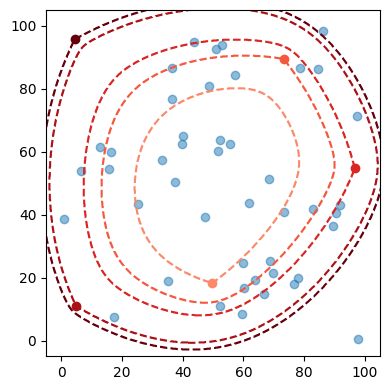

In [15]:
# Choose a cut a plot
fig,axes = plt.subplots(1,figsize=(4,4))
ex.plot_zones_onto_axes(axes,y2,X_2a,Y_2a,Z_2a,dp)
axes.set_xlim(-5,105)
axes.set_ylim(-5,105)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_y2_zones.pdf")
plt.show()

In [16]:
print("Proportion of removed solutions:\t",ex.get_proportion_solutions_removed(dp,y2))

Proportion of removed solutions:	 0.5385517944458079


# Circle Exclusion

In [17]:
# Setup problem
nc=20
pc=5
np.random.seed(11)
dpc = DiversityProblem.circle(nc,pc,s)

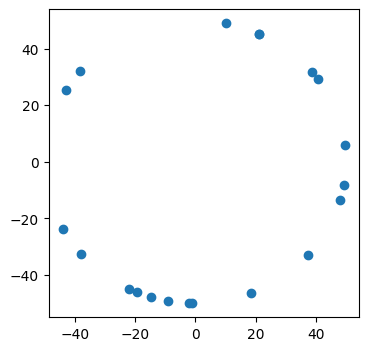

In [18]:
fig,axes=plt.subplots(1,figsize=(4,4))
axes.plot(dpc.locations[:,0],dpc.locations[:,1],ls="",marker="o")
plt.show()

In [19]:
y1c = ex.get_rand_sol(dpc)

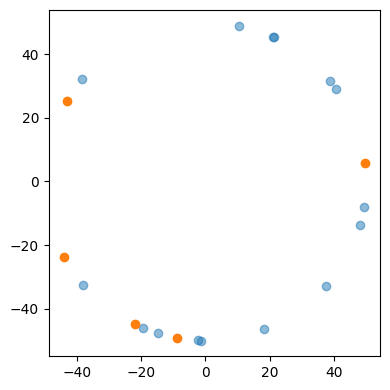

In [20]:
fig,axes = plt.subplots(1,figsize=(4,4))
axes.plot(dpc.locations[y1c==0,0],dpc.locations[y1c==0,1],ls="",marker="o",alpha=0.5)
axes.plot(dpc.locations[y1c==1,0],dpc.locations[y1c==1,1],ls="",marker="o")
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_circle_sol.pdf")
plt.show()

In [21]:
X_1ac, Y_1ac, Z_1ac = ex.get_exclusion_zones(dpc,y1c,space_increase=20)

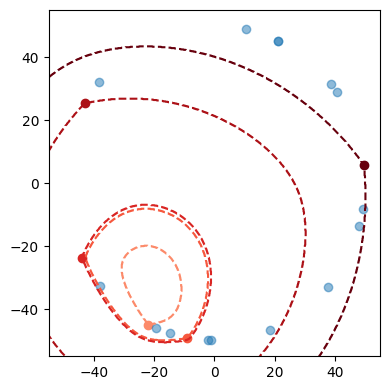

In [22]:
# Choose a cut a plot
fig,axes = plt.subplots(1,figsize=(4,4))
ex.plot_zones_onto_axes(axes,y1c,X_1ac,Y_1ac,Z_1ac,dpc)
axes.set_xlim(-55,55)
axes.set_ylim(-55,55)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_circle_zones_a.pdf")
plt.show()

In [23]:
y1c = ex.get_heur_sol(dpc,timelimit=10)

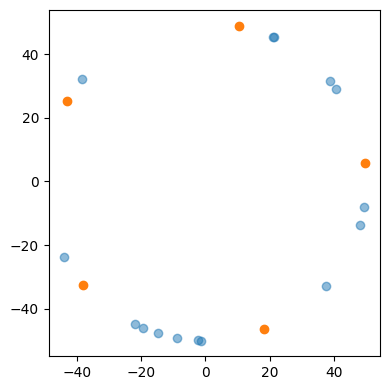

In [24]:
fig,axes = plt.subplots(1,figsize=(4,4))
axes.plot(dpc.locations[y1c==0,0],dpc.locations[y1c==0,1],ls="",marker="o",alpha=0.5)
axes.plot(dpc.locations[y1c==1,0],dpc.locations[y1c==1,1],ls="",marker="o")
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_circle_sol.pdf")
plt.show()

In [25]:
X_1ac, Y_1ac, Z_1ac = ex.get_exclusion_zones(dpc,y1c,space_increase=20)

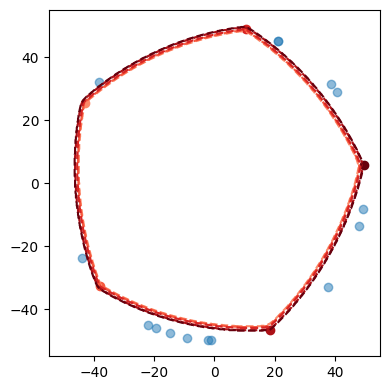

In [26]:
# Choose a cut a plot
fig,axes = plt.subplots(1,figsize=(4,4))
ex.plot_zones_onto_axes(axes,y1c,X_1ac,Y_1ac,Z_1ac,dpc)
axes.set_xlim(-55,55)
axes.set_ylim(-55,55)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_circle_zones_b.pdf")
plt.show()

In [27]:
print("Proportion of removed solutions:\t",ex.get_proportion_solutions_removed(dpc,y1c))

Proportion of removed solutions:	 6.449948400412796e-05


# Projections

In [28]:
# project into y
import copy
dp_py = copy.deepcopy(dp)
dp_py.locations[:,0] = dp_py.locations[:,0] * 0
dp_py._build_edm()
X1a_py, Y1a_py, Z1a_py = ex.get_exclusion_zones(dp_py,y1,space_increase=30)
dp_px = copy.deepcopy(dp)
dp_px.locations[:,1] = dp_px.locations[:,1] * 0
dp_px._build_edm()
X1a_px, Y1a_px, Z1a_px = ex.get_exclusion_zones(dp_px,y1,space_increase=30)

/tmp/ipykernel_557185/2219785143.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


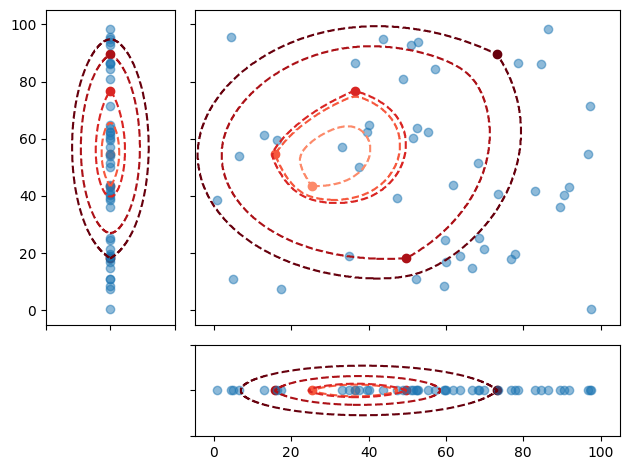

In [29]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    BAAA
    BAAA
    BAAA
    .CCC
    """
)

ex.plot_zones_onto_axes(axd["A"],y1,X_1a,Y_1a,Z_1a,dp)
ex.plot_zones_onto_axes(axd["B"],y1,X1a_py,Y1a_py,Z1a_py,dp_py)
ex.plot_zones_onto_axes(axd["C"],y1,X1a_px,Y1a_px,Z1a_px,dp_px)

axd["A"].tick_params(labelbottom=False,labelleft=False)
axd["B"].tick_params(labelbottom=False)
axd["C"].tick_params(labelleft=False)

axd["A"].set_xlim(-5,105)
axd["A"].set_ylim(-5,105)
axd["B"].set_xlim(-50,50)
axd["B"].set_ylim(-5,105)
axd["C"].set_xlim(-5,105)
axd["C"].set_ylim(-50,50)

plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_projection.pdf")
plt.show()